# We implement our algorithm for p=2 on simple functions:

## $f(x,y) = \frac{k}{2}(x^2-y^2)+xy$

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
k=2

In [18]:
def oracle_1(x,y):
    gx = k*x+y
    gy = -k*y+x
    gxy = 1
    F = [gx,gy]
    return(F)

def oracle_2(x,y):
    gxx = k
    gxy = 1
    gyy = -k
    nabla_F = np.zeros((2,2))
    nabla_F[0][0] = gxx
    nabla_F[0][1] = gxy
    nabla_F[1][0] = gxy
    nabla_F[1][1] = gyy

    return(nabla_F)

$F = (kx+y,-ky+x)$

$\nabla F =
\left(\begin{array}
1k & 1\\
1 & -k
\end{array}\right)
$

In [19]:
#initialize iterates
x_init,y_init = 0.5,0.5

def iteration(x,y,delta):
    #set parameters
    l = 0
#     delta = 0.1

    norm_F = np.linalg.norm(oracle_1(x_init,y_init))
    u = norm_F/delta

    nu = delta*u**2/norm_F

    lambd = (l+u)/2
    lambda_m = lambd-nu

    #prepare loop
    A_1 = oracle_2(x,y)
    A_1[0][0] += lambd
    A_1[1][1] += lambd
    
    A_2 = oracle_2(x,y)
    A_2[0][0] += lambda_m
    A_2[1][1] += lambda_m
    
    temp_1 = np.linalg.norm(np.linalg.solve(A_1,oracle_1(x_init,y_init)))
    temp_2 = np.linalg.norm(np.linalg.solve(A_2,oracle_1(x_init,y_init)))


    while (not temp_1 <= lambd) and (temp_2> lambda_m):
        if lambd <= delta*u**2/norm_F:
            
            break
        if temp_1 <= lambd:
            u = lambd
            lambd = (l+u)/2
            lambda_m = lambd-nu
        else:
            l = lambd
            lambd = (l+u)/2
            lambda_m = lambd-nu
            A_1 = oracle_2(x,y)
            A_1[0][0] += lambd
            A_1[1][1] += lambd
    return([x,y]-np.linalg.solve(A_1,oracle_1(x_init,y_init)))

In [20]:
def HO_MVI(x_init,y_init,N,delta):
    x,y = x_init,y_init
    iterates_x = [x]
    iterates_y = [y]
    
    for i in range(N):
        x,y = iteration(x,y,delta)
        iterates_x.append(x)
        iterates_y.append(y)
    return(iterates_x,iterates_y)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


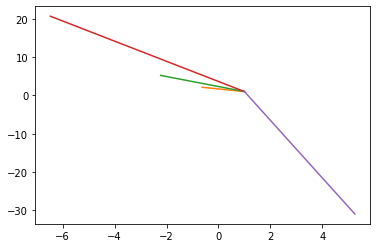

In [21]:
for i in np.arange(0,0.5,0.1):
    iterates = (HO_MVI(1,1,10,i))
    plt.plot(iterates[0],iterates[1])